In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def Energy(x):
    return (x - 3)**2

In [143]:
# Initialize x
x = np.random.randint(1,9)
# Initialize chain
chain = []
# Initialize running sum
rad = 0

iterations = 200000
for i in xrange(iterations):
    # Propose y (this will probably maximal neighborhood)
    # y = np.random.randint(1,9)
    
    # Propose y (but not maximal neighborhood)
    if np.random.uniform(0,1) < 0.5:
        if x != 1:
            y = x - 1
        else:
            y = x
    else:
        if x != 8:
            y = x + 1
        else:
            x = x
    
    # Compute h
    def h(y, x):
        return min(1, np.exp(-(Energy(y) - Energy(x))))
    
    # Step forward
    if h(y,x) > np.random.uniform(0,1):
        # Update x
        x = y
    
    # Update running sum of radiation
    rad += Energy(x)**4
    
    # Record results
    chain.append(x)

print(float(rad)/iterations)

5.80668


(array([2.05800e+03, 0.00000e+00, 4.15900e+04, 0.00000e+00, 1.12514e+05,
        0.00000e+00, 4.17590e+04, 0.00000e+00, 2.07600e+03, 3.00000e+00]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <a list of 10 Patch objects>)

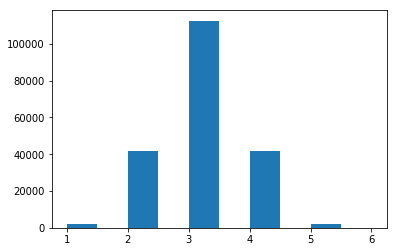

In [144]:
plt.hist(chain)

In [131]:
# Find the transition matrix

# Initialize array
P = np.zeros((8,8))

for i in xrange(8):
    for j in xrange(8):
        P[i,j] = np.exp(-(Energy(j) - Energy(i)))

eigenvalues, eigenvectors = np.linalg.eig(P)

In [137]:
eiglist = list(eigenvalues)

In [139]:
eiglist.pop(eiglist.index(max(eigenvalues)))

(8.000000000000002+0j)

In [141]:
max(eiglist)

(8.881784197001252e-16+0j)